In [ ]:
!ls

car_prices.csv.zip  sample_data


In [ ]:
!unzip 'car_prices.csv.zip'

Archive:  car_prices.csv.zip
  inflating: car_prices.csv          


In [ ]:
import pandas as pd
df=pd.read_csv("car_prices.csv",parse_dates=True,error_bad_lines=False,warn_bad_lines=True)

b'Skipping line 408163: expected 16 fields, saw 17\nSkipping line 417837: expected 16 fields, saw 17\nSkipping line 421291: expected 16 fields, saw 17\nSkipping line 424163: expected 16 fields, saw 17\n'
b'Skipping line 427042: expected 16 fields, saw 17\nSkipping line 427045: expected 16 fields, saw 17\nSkipping line 434426: expected 16 fields, saw 17\nSkipping line 444503: expected 16 fields, saw 17\nSkipping line 453796: expected 16 fields, saw 17\n'
b'Skipping line 461599: expected 16 fields, saw 17\nSkipping line 461614: expected 16 fields, saw 17\n'
b'Skipping line 492486: expected 16 fields, saw 17\nSkipping line 497010: expected 16 fields, saw 17\nSkipping line 497013: expected 16 fields, saw 17\nSkipping line 499085: expected 16 fields, saw 17\nSkipping line 501457: expected 16 fields, saw 17\nSkipping line 505301: expected 16 fields, saw 17\nSkipping line 505308: expected 16 fields, saw 17\nSkipping line 520463: expected 16 fields, saw 17\n'
b'Skipping line 528998: expected 1

In [ ]:
df.shape

(558811, 16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


## To  Rename the columns

In [ ]:
df = df.rename(columns={"year": "Year", "make": "Brand","model":"Model","trim": "Version", "transmission": "Transmission", "body": "Type","state": "Place",
                        "condition": "Condition", "odometer": "Odometer","color":"Colour","interior":"Interior","seller":"Seller",
                       "sellingprice":"Price","saledate":"SaleDate"})


##vin: Vehicle identification number ,so we drop vin from dataframe

In [ ]:
df.drop('vin',axis=1,inplace=True)

## Sometimes Data may have duplicate Rows. Here I checked the number of Duplicate rows, but there was no duplicate rows.

In [ ]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 15)


## This data contains more null values. I'm displaying the null values in the dataset

In [ ]:
df.isnull().sum()

Year                0
Brand           10301
Model           10399
Version         10651
Type            13195
Transmission    65353
Place               0
Condition       11794
Odometer           94
Colour            749
Interior          749
Seller              0
mmr                 0
Price               0
SaleDate            0
dtype: int64

## Here I'm dropping/deleting the null values. Since this is a very large dataset deleting some will not affect the whole data.

In [ ]:
df=df.dropna()
df.count()

Year            472336
Brand           472336
Model           472336
Version         472336
Type            472336
Transmission    472336
Place           472336
Condition       472336
Odometer        472336
Colour          472336
Interior        472336
Seller          472336
mmr             472336
Price           472336
SaleDate        472336
dtype: int64

In [ ]:
df.isnull().sum()

Year            0
Brand           0
Model           0
Version         0
Type            0
Transmission    0
Place           0
Condition       0
Odometer        0
Colour          0
Interior        0
Seller          0
mmr             0
Price           0
SaleDate        0
dtype: int64

In [ ]:
df.describe()

,Year,Condition,Odometer,mmr,Price
count,472336.000000,472336.000000,472336.000000,472336.000000,472336.000000
mean,2010.211045,3.426576,66701.070003,13836.999773,13690.403670
std,3.822131,0.943659,51939.183430,9532.131753,9612.962279
min,1990.000000,1.000000,1.000000,25.000000,1.000000
25%,2008.000000,2.700000,28137.000000,7425.000000,7200.000000
50%,2012.000000,3.600000,51084.000000,12300.000000,12200.000000
75%,2013.000000,4.200000,96589.000000,18300.000000,18200.000000
max,2015.000000,5.000000,999999.000000,182000.000000,230000.000000


In [ ]:
df.corr()

,Year,Condition,Odometer,mmr,Price
Year,1.000000,0.548307,-0.773104,0.588605,0.578918
Condition,0.548307,1.000000,-0.537544,0.481460,0.535990
Odometer,-0.773104,-0.537544,1.000000,-0.582648,-0.577385
mmr,0.588605,0.481460,-0.582648,1.000000,0.983492
Price,0.578918,0.535990,-0.577385,0.983492,1.000000


## from above correlation we saw the feature mmr is highly correlated with the price but mmr feature is prime component to predict auction car prices.

##Manheim Market Report (MMR)-
*  It is the premier indicator of wholesale prices.
*  It generates after every 8 months.




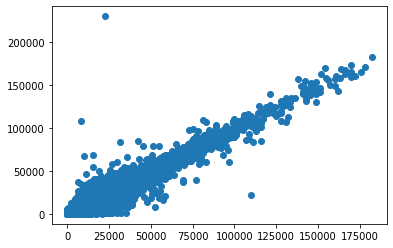

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['mmr'],df['Price'])
plt.show()

In [ ]:
df.shape

(472336, 15)

In [ ]:
pd.DataFrame([df.isnull().mean(),df.dtypes,df.nunique()],index=['null_per','dtypes','nuique'])\
    .sort_values(by=['null_per'],axis=1,ascending=False)

,Year,Brand,Model,Version,Type,Transmission,Place,Condition,Odometer,Colour,Interior,Seller,mmr,Price,SaleDate
null_per,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
dtypes,int64,object,object,object,object,object,object,float64,float64,object,object,object,int64,int64,object
nuique,26,53,768,1507,85,2,34,41,160427,20,17,11927,1099,1806,3609


# extract selling date info

In [ ]:
import datetime
df['sale_datetime'] = pd.to_datetime(df['SaleDate'],utc=True)
df['SaleDate'] = pd.DatetimeIndex(df['sale_datetime']).year

#Here we extracting the feature (age of car) by doing Feature Engineering from saledate and year of manufacturing.

In [ ]:
df["Car_age"]=df['SaleDate']-df['Year']

In [ ]:
df['Car_age'].head()

0   -1
1   -1
2    1
3    0
4    0
Name: Car_age, dtype: int64

# Here we got the car_age negative but car age will never negative so we taking only the positive ages of car below.

In [ ]:
df= df[df["Car_age"]>=0] 

In [ ]:
df.drop('SaleDate',axis=1,inplace=True)

In [ ]:
df.drop('sale_datetime',axis=1,inplace=True)

#Here we are converting all the categorical columns into lower case so that data should be less redundant.

In [ ]:
df['Type']=df['Type'].map(lambda x:str(x).lower())
df['Brand']=df['Brand'].map(lambda x:str(x).lower())
df['Model']=df['Model'].map(lambda x:str(x).lower())
df['Version']=df['Version'].map(lambda x:str(x).lower())
df['Place']=df['Place'].map(lambda x:str(x).lower())
df['Colour']=df['Colour'].map(lambda x:str(x).lower())
df['Interior']=df['Interior'].map(lambda x:str(x).lower())
df['Seller']=df['Seller'].map(lambda x:str(x).lower())

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472179 entries, 2 to 558810
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Year          472179 non-null  int64  
 1   Brand         472179 non-null  object 
 2   Model         472179 non-null  object 
 3   Version       472179 non-null  object 
 4   Type          472179 non-null  object 
 5   Transmission  472179 non-null  object 
 6   Place         472179 non-null  object 
 7   Condition     472179 non-null  float64
 8   Odometer      472179 non-null  float64
 9   Colour        472179 non-null  object 
 10  Interior      472179 non-null  object 
 11  Seller        472179 non-null  object 
 12  mmr           472179 non-null  int64  
 13  Price         472179 non-null  int64  
 14  Car_age       472179 non-null  int64  
dtypes: float64(2), int64(4), object(9)
memory usage: 57.6+ MB


##Finding the outliers in the data. Here I plotted the outliers in Ododmeter and Price. Since the outliers of odometer and price show some influence in the data, I'm not deleting the outliers. Because the price of a vehicle and distance travelled will depends on many other factors.

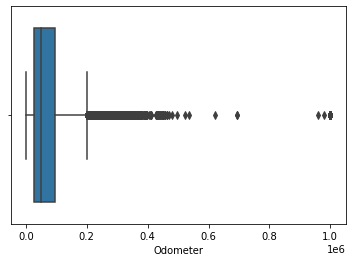

In [ ]:
import seaborn as sns
sns.boxplot(x=df['Odometer'])

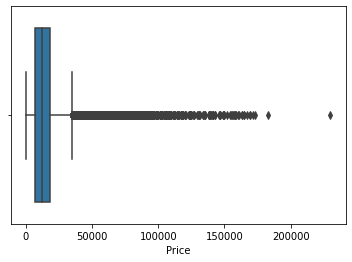

In [ ]:
sns.boxplot(x=df['Price'])

#Plotted a graph of Number of vehicles vs Brands to identify the top brands in the auction. And Ford was most.

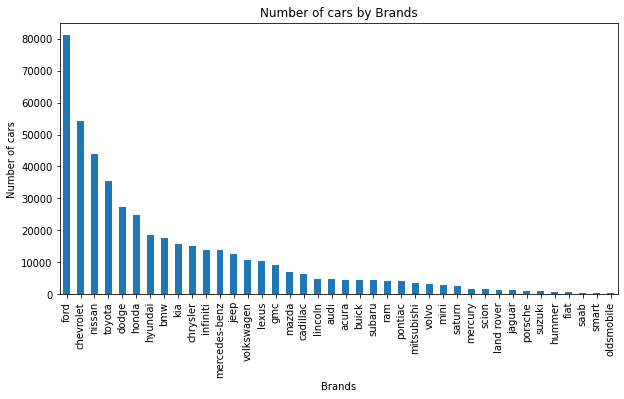

In [ ]:
import matplotlib.pyplot as plt
df.Brand.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by Brands")
plt.ylabel('Number of cars')
plt.xlabel('Brands');

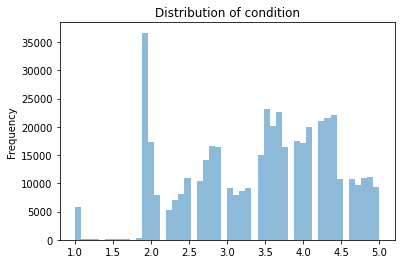

In [ ]:
df['Condition'].plot.hist(bins=50,alpha=0.5,title='Distribution of condition')

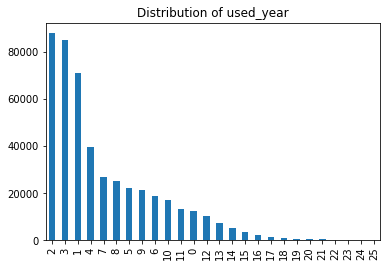

In [ ]:
df['Car_age'].value_counts().plot.bar(title='Distribution of used_year')

## So deals from the dataset indicate that people are more inclined to using their cars in 4 years, driving within 200,000 kilometers and sell cars with good or bad conditions.

## Here we are showing distribution of target variable

Text(0, 0.5, 'Selling Price')

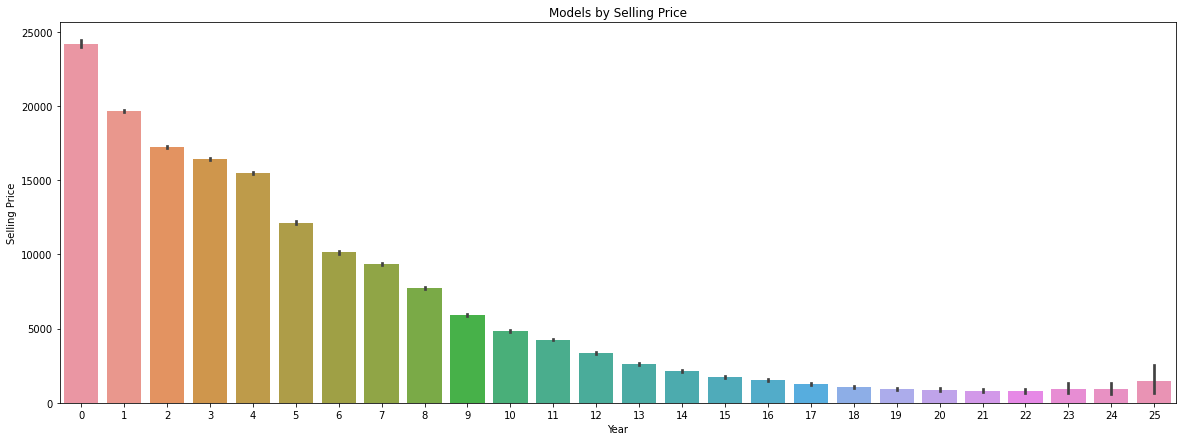

In [ ]:
plt.figure(figsize=(20,7))
sns.barplot(x='Car_age',y='Price',data=df)
plt.title('Models by Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')

Text(0, 0.5, 'Total Cars')

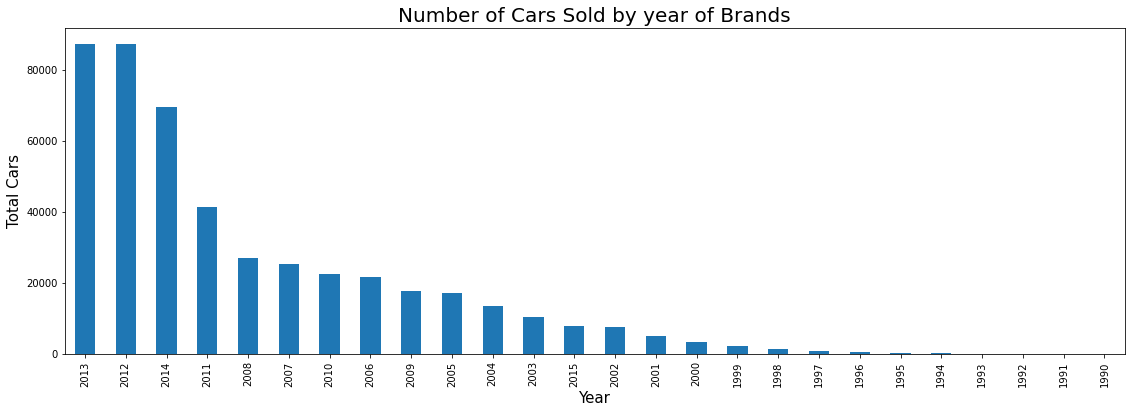

In [ ]:
plt.figure(figsize=(19,6))

df['Year'].value_counts().plot(kind='bar')

plt.title('Number of Cars Sold by year of Brands',fontsize=20)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Total Cars',fontsize=15)

In [ ]:
df.drop('Year',axis=1,inplace=True)

### we performed EDA on the Car Auction dataset to understand the factors influencing the Auction of used car's. It was a large dataset containing about 558k rows. we have deleted the null values and irrelevent columns to get better understandings of the data.

In this analysis, we plotted some graphs to show the distribution of selling price according to different factors like Odometer, Year of the model and the Brands of the vehicle.

From this analysis, we could understand that, the factors like Odometer(the distance travelled by the vehicle), Brands of vehicle and Year of the model are mainly influencing the auction of used cars. Cars with lesser odometer are getting good selling price in the auction.

In [ ]:
df.drop('Seller',axis=1,inplace=True)

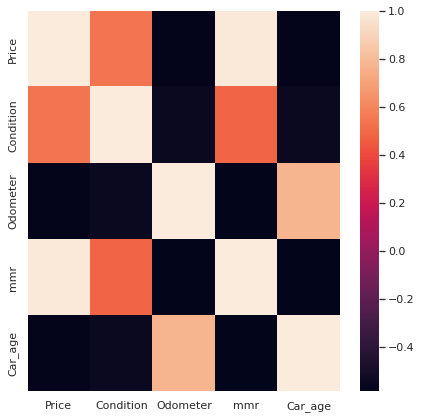

In [ ]:
heatmap_col=['Price','Condition','Odometer','mmr','Car_age']
sns.set(rc={'figure.figsize':(7,7)})
sns.heatmap(df[heatmap_col].corr());

In [ ]:
df.nunique()

Brand               53
Model              764
Version           1488
Type                45
Transmission         2
Place               34
Condition           41
Odometer        160418
Colour              20
Interior            17
mmr               1099
Price             1806
Car_age             26
dtype: int64

# as we see there are lot of categorical columns in the data which is not important as we are doing regression and which increases the column size after doing one hot encoding so just selected the most corelated features for prediction

In [ ]:
X=df.drop(['Price','Brand','Model','Version','Interior','Type','Place','Colour'],axis=1)
Y=df['Price']

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.columns

Index(['Condition', 'Odometer', 'mmr', 'Car_age', 'Transmission_manual'], dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
trans_X = scaler.fit_transform(X)
print(trans_X)

[[0.875      0.00133    0.17516142 0.04       0.        ]
 [0.775      0.01428103 0.15098228 0.         0.        ]
 [0.825      0.00264001 0.3625498  0.         0.        ]
 ...
 [0.95       0.0505601  0.16362138 0.12       0.        ]
 [0.7        0.01665703 0.08284105 0.         0.        ]
 [0.6        0.01500703 0.16252232 0.04       0.        ]]


In [ ]:
X=pd.DataFrame(trans_X)

In [ ]:
X.shape,Y.shape

((472179, 5), (472179,))

In [ ]:
X=X.rename(columns={0:'Condition',1:'Odometer',2: 'mmr',3: 'Car_age',4: 'Transmission_manual'} )

In [ ]:
X.head()

,Condition,Odometer,mmr,Car_age,Transmission_manual
0,0.875,0.001330,0.175161,0.04,0.0
1,0.775,0.014281,0.150982,0.00,0.0
2,0.825,0.002640,0.362550,0.00,0.0
3,0.600,0.014942,0.379036,0.00,0.0
4,0.250,0.028616,0.065256,0.00,0.0


In [ ]:
X.describe()

,Condition,Odometer,mmr,Car_age,Transmission_manual
count,472179.000000,472179.000000,472179.000000,472179.000000,472179.000000
mean,0.606585,0.066718,0.075875,0.188519,0.034650
std,0.235879,0.051938,0.052356,0.152752,0.182892
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425000,0.028156,0.040665,0.080000,0.000000
50%,0.650000,0.051102,0.067454,0.120000,0.000000
75%,0.800000,0.096606,0.100426,0.280000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=7)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((330525, 5), (141654, 5), (330525,), (141654,))

In [ ]:
#from sklearn.decomposition import PCA
# Make an instance of the Model
# Principle Component Analysis
#pca = PCA(10) # Give the number of features to PCA
#pca.fit(X_train)
#X_train = pca.transform(X_train)
#X_test = pca.transform(X_test)
#print(X_train.shape)
#X_train[:5]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model=RandomForestRegressor(random_state=7).fit(X_train,Y_train)
ypred=model.predict(X_test)

In [ ]:
from sklearn import metrics
import numpy as np
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, ypred))
#Print result of MSE
print(metrics.mean_squared_error(Y_test, ypred))
#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error (Y_test, ypred)))

1006.5978341559281
2413184.325012969
1553.4427330973513


In [ ]:
from sklearn.metrics import r2_score,accuracy_score

In [ ]:
a = metrics.r2_score(Y_test, ypred)

In [ ]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression().fit(X_train,Y_train)

In [ ]:
ypred1=model1.predict(X_test)

In [ ]:
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, ypred1))
#Print result of MSE
print(metrics.mean_squared_error(Y_test, ypred1))
#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error (Y_test, ypred1)))

978.5136930022451
2325130.4051458305
1524.83782912998


In [ ]:
b = metrics.r2_score(Y_test, ypred1)

In [ ]:
#Train the model
from sklearn.ensemble import GradientBoostingRegressor
GBR = GradientBoostingRegressor()

In [ ]:
model2=GBR.fit(X_train,Y_train)

In [ ]:
ypred=model2.predict(X_test)

In [ ]:
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, ypred))
#Print result of MSE
print(metrics.mean_squared_error(Y_test, ypred))
#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error (Y_test, ypred)))

940.6986744728902
2131391.1976728197
1459.9284906024745


In [ ]:
c = metrics.r2_score(Y_test, ypred)

In [ ]:
#from sklearn.svm import SVR

In [ ]:
#svr=SVR()

In [ ]:
#ypred=model.predict(X_test)

In [ ]:
# Print result of MAE
#print(metrics.mean_absolute_error(Y_test, ypred))

#Print result of MSE

#print(metrics.mean_squared_error(Y_test, ypred))

#Print result of RMSE

#print(np.sqrt(metrics.mean_squared_error (Y_test, ypred)))

In [ ]:
#metrics.r2_score(Y_test, ypred)

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
model3=ExtraTreesRegressor().fit(X_train,Y_train)

In [ ]:
y_pred=model3.predict(X_test)

In [ ]:
# Print result of MAE
print(metrics.mean_absolute_error(Y_test, ypred))
#Print result of MSE
print(metrics.mean_squared_error(Y_test, ypred))
#Print result of RMSE
print(np.sqrt(metrics.mean_squared_error (Y_test, ypred)))

940.6986744728902
2131391.1976728197
1459.9284906024745


In [ ]:
 d = metrics.r2_score(Y_test, ypred)

0.9771148463574312

In [ ]:
test_score = pd.DataFrame({
    'model': ['RandomForestRegressor', 'Linear Regression','Gradient Boosting Regressor', 'ExtraTreesRegressor'],
    
    'test_score': [a,b,c,d]
    })
test_score

,model,test_score
0,RandomForestRegressor,0.974089
1,Linear Regression,0.975035
2,Gradient Boosting Regressor,0.977115
3,ExtraTreesRegressor,0.977115


In [ ]:
train_score = pd.DataFrame({
    'model': ['RandomForestRegressor', 'Linear Regression','Gradient Boosting Regressor', 'ExtraTreesRegressor'],
    'train_score': [model.score(X_train, Y_train), model1.score(X_train, Y_train),
                model2.score(X_train, Y_train) , model3.score(X_train, Y_train)]
})
train_score

,model,train_score
0,RandomForestRegressor,0.999995
1,Linear Regression,0.972399
2,Gradient Boosting Regressor,0.974914
3,ExtraTreesRegressor,0.999994
